In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations
from collections import Counter

import networkx as nx

In [20]:
data = pd.read_parquet('D:/소셜네트워크과학/Drug_Coprescription_Network_Analysis/data/antidepressant_prescription_all_years.parquet')
data

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,ATC코드
0,2017,31,47455974,2,2,10,26,2017-03-23,229601ATB,1.0,2,35,152.0,10640,2018-11-26,N06AX14
1,2017,56,36005918,2,2,11,30,2017-11-13,229601ATB,1.0,3,14,158.0,6636,2018-11-26,N06AX14
2,2017,62,7819529,2,1,12,41,2017-07-11,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05
3,2017,62,35429246,2,1,12,41,2017-08-08,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05
4,2017,62,37765102,5,1,12,41,2017-06-09,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183763,2021,362319,8537598,1,1,8,41,2021-05-05,161502ACH,3.0,1,30,483.0,43470,2022-08-11,N06AB03
1183764,2021,975259,8678062,2,2,6,11,2021-12-25,613101ATB,0.5,1,14,591.0,4137,2022-08-11,N06AX22
1183765,2021,302702,10860741,2,2,13,47,2021-08-08,242901ATB,0.5,2,63,47.0,2961,2022-08-11,N06AX05
1183766,2021,766500,11702317,3,1,17,44,2021-05-05,227001ATB,0.5,1,21,499.0,5240,2022-08-11,N06AB06


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183768 entries, 0 to 1183767
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   기준년도         1183768 non-null  int64         
 1   가입자일련번호      1183768 non-null  int64         
 2   처방내역일련번호     1183768 non-null  int64         
 3   일련번호         1183768 non-null  int64         
 4   성별코드         1183768 non-null  int64         
 5   연령대코드(5세단위)  1183768 non-null  int64         
 6   시도코드         1183768 non-null  int64         
 7   요양개시일자       1183768 non-null  datetime64[ns]
 8   약품일반성분명코드    1183768 non-null  object        
 9   1회 투약량       1183768 non-null  float64       
 10  1일투약량        1183768 non-null  int64         
 11  총투여일수        1183768 non-null  int64         
 12  단가           1183768 non-null  float64       
 13  금액           1183768 non-null  int64         
 14  데이터 공개일자     1183768 non-null  datetime64[ns]
 15  ATC코드        11

In [25]:
data[data['기준년도']== 2021]

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,ATC코드
907637,2021,856296,1707917,1,2,13,41,2021-09-28,495501ACE,1.0,1,3,363.0,1089,2022-08-11,N06AX21
907638,2021,454748,3323987,1,2,13,41,2021-01-25,242901ACH,1.0,1,3,40.0,120,2022-08-11,N06AX05
907639,2021,251575,764386,1,2,13,41,2021-09-13,196204ATB,1.0,1,30,448.0,13440,2022-08-11,N06AX11
907640,2021,235148,2654234,1,2,13,41,2021-10-13,107501ATB,1.0,1,30,23.0,690,2022-08-11,N06AA09
907641,2021,524895,3529380,1,2,13,41,2021-10-01,209305ATR,1.0,1,30,729.0,21870,2022-08-11,N06AB05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183763,2021,362319,8537598,1,1,8,41,2021-05-05,161502ACH,3.0,1,30,483.0,43470,2022-08-11,N06AB03
1183764,2021,975259,8678062,2,2,6,11,2021-12-25,613101ATB,0.5,1,14,591.0,4137,2022-08-11,N06AX22
1183765,2021,302702,10860741,2,2,13,47,2021-08-08,242901ATB,0.5,2,63,47.0,2961,2022-08-11,N06AX05
1183766,2021,766500,11702317,3,1,17,44,2021-05-05,227001ATB,0.5,1,21,499.0,5240,2022-08-11,N06AB06


In [26]:
years = [2017, 2018, 2019, 2020, 2021]
for year in years:
        print(data[data['기준년도']== year].shape[0])

205686
212869
231136
257946
276131


## 동적 네트워크 생성하기(월별로 엣지 갱신)(누적X)

In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

def create_monthly_dataframes(data):
    # 날짜 형식 변환
    data['요양개시일자'] = pd.to_datetime(data['요양개시일자'])
    
    # 월별 데이터프레임 저장할 딕셔너리
    monthly_dfs = {}
    
    # 2017년부터 2021년까지
    for year in range(2017, 2022):
        for month in range(1, 13):
            # 해당 월의 데이터 필터링
            month_start = datetime(year, month, 1)
            month_end = datetime(year, month, calendar.monthrange(year, month)[1])
            
            df_month = data[
                (data['요양개시일자'] >= month_start) & 
                (data['요양개시일자'] <= month_end)
            ].copy()
            
            # 컬럼명 변경
            df_month.rename(columns={
                '요양개시일자': 'RECU_FR_DT',
                'ATC코드': 'ATC_code',
                '처방내역일련번호': 'pid'
            }, inplace=True)
            
            # monthly_dfs에 저장
            month_key = (year - 2017) * 12 + month
            monthly_dfs[month_key] = df_month
    
    return monthly_dfs

In [38]:
def create_dynamic_gexf(monthly_dfs):
    G = nx.Graph()
    
    # 1. 노드 ID 표준화 및 시간 형식 수정
    for df in monthly_dfs.values():
        df['RECU_FR_DT'] = pd.to_datetime(df['RECU_FR_DT'])
    
    # 2. 모든 고유 노드 추출 (ATC코드 기준)
    all_nodes = set()
    for df in monthly_dfs.values():
        all_nodes.update(set(df['ATC_code']))
    
    # 3. 노드 추가 (전체 기간 동안 노드 유지)
    for node in all_nodes:
        G.add_node(node, 
                  label=str(node),
                  start='2017-01-01T00:00:00.000',
                  end='2021-12-31T23:59:59.000')
    
    # 4. 월별로 엣지 추가 및 interval 관리
    edge_info = {}  # 엣지의 시작 시간과 가중치 정보 저장
    
    for month, df in sorted(monthly_dfs.items()):
        year = 2017 + (month - 1) // 12
        current_month = ((month - 1) % 12) + 1
        month_end = f'{year}-{current_month:02d}-{calendar.monthrange(year, current_month)[1]}T23:59:59.000'
        
        # 현재 월의 엣지 정보 수집
        current_edges = set()
        grouped = df.groupby('pid')
        
        for pid, group in grouped:
            prescription_date = group['RECU_FR_DT'].iloc[0]
            start_date = prescription_date.strftime('%Y-%m-%dT00:00:00.000')
            
            drugs = group['ATC_code'].unique()
            for i in range(len(drugs)):
                for j in range(i + 1, len(drugs)):
                    source = str(drugs[i])
                    target = str(drugs[j])
                    edge_key = (source, target)
                    current_edges.add(edge_key)
                    
                    # 새로운 엣지이거나 이전 달에 없었던 엣지
                    if edge_key not in edge_info:
                        edge_info[edge_key] = {
                            'start': start_date,
                            'end': month_end,
                            'weight': 1
                        }
                    else:
                        # 이미 존재하는 엣지는 종료 시간 갱신
                        edge_info[edge_key]['end'] = month_end
                        edge_info[edge_key]['weight'] += 1
        
        # 현재 월에 없는 엣지 처리
        for edge_key in list(edge_info.keys()):
            if edge_key not in current_edges:
                # 엣지 추가
                source, target = edge_key
                G.add_edge(source, target,
                          weight=float(edge_info[edge_key]['weight']),
                          start=edge_info[edge_key]['start'],
                          end=edge_info[edge_key]['end'])
                # 정보 삭제
                del edge_info[edge_key]
    
    # 마지막 달의 엣지들 추가
    for edge_key, info in edge_info.items():
        source, target = edge_key
        G.add_edge(source, target,
                  weight=float(info['weight']),
                  start=info['start'],
                  end=info['end'])
    
    # 5. Degree centrality 및 노드 크기 계산
    degree_centrality = nx.degree_centrality(G)
    max_size, min_size = 100, 10
    
    for node in all_nodes:
        size = min_size + (degree_centrality[node] * (max_size - min_size))
        G.nodes[node]['size'] = size
    
    nx.write_gexf(G, '2017_2021_dynamic_drug_network(atc)_4.gexf', version='1.2draft')
    return G

In [39]:
# 실행
monthly_dfs = create_monthly_dataframes(data)
G = create_dynamic_gexf(monthly_dfs)

### N06AB04 노드와 연결된게 있는지 확인하기

In [6]:
# N06AB04가 포함된 처방전 찾기
prescriptions_with_target = data[data['ATC코드'] == 'N06AB04']['처방내역일련번호'].unique()

# 해당 처방전에서 다른 약품들의 처방 현황 확인
co_prescribed = data[
    (data['처방내역일련번호'].isin(prescriptions_with_target)) & 
    (data['ATC코드'] != 'N06AB04')
]

In [7]:
co_prescribed

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,ATC코드
95693,2017,468794,7750566,3,1,7,44,2017-01-06,162502ATB,1.0,1,28,563.0,15764,2018-11-26,N06AB08
95695,2017,468794,8008650,2,1,7,44,2017-02-25,162502ATB,1.0,1,28,563.0,15764,2018-11-26,N06AB08
95697,2017,468794,10361314,2,1,7,44,2017-10-12,162502ATB,1.0,1,28,563.0,15764,2018-11-26,N06AB08
95699,2017,468794,16874727,2,1,7,44,2017-11-30,162502ATB,1.0,1,28,563.0,15764,2018-11-26,N06AB08
95701,2017,468794,25841024,2,1,7,44,2017-09-11,162502ATB,1.0,1,28,563.0,15764,2018-11-26,N06AB08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298843,2018,436509,5998107,3,2,8,44,2018-01-31,242901ATB,1.0,1,14,40.0,560,2019-12-17,N06AX05
561351,2019,616602,109894453,3,1,9,44,2019-05-02,136301ACH,1.0,2,28,73.0,4088,2020-12-22,N06AA04
561353,2019,616602,100593814,3,1,9,44,2019-02-16,136301ACH,1.0,2,28,73.0,4088,2020-12-22,N06AA04
561357,2019,616602,104807724,3,1,9,44,2019-03-23,136301ACH,1.0,2,28,73.0,4088,2020-12-22,N06AA04


### N06AX 도 있네?

In [8]:
# N06AX가 포함된 처방전 찾기
prescriptions_with_target = data[data['ATC코드'] == 'N06AX']['처방내역일련번호'].unique()

# 해당 처방전에서 다른 약품들의 처방 현황 확인
co_prescribed = data[
    (data['처방내역일련번호'].isin(prescriptions_with_target)) & 
    (data['ATC코드'] != 'N06AX')
]

In [9]:
co_prescribed

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,ATC코드
3505,2017,16928,27300844,4,2,18,47,2017-03-27,495501ACE,1.0,1,15,404.0,6060,2018-11-26,N06AX21
8248,2017,41647,9999312,6,2,18,47,2017-03-20,495501ACE,1.0,1,7,404.0,2828,2018-11-26,N06AX21
8250,2017,41647,15437905,3,2,18,47,2017-01-19,495501ACE,1.0,1,15,404.0,6060,2018-11-26,N06AX21
8251,2017,41647,19557519,3,2,18,47,2017-07-24,495501ACE,1.0,1,30,404.0,12120,2018-11-26,N06AX21
8254,2017,41647,20196926,4,2,18,47,2017-02-06,495501ACE,1.0,1,15,404.0,6060,2018-11-26,N06AX21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178364,2021,400521,11560293,2,2,13,30,2021-12-13,474802ATB,0.5,1,28,535.0,7490,2022-08-11,N06AB10
1179157,2021,401690,9936610,5,2,18,48,2021-04-02,474802ATB,0.5,1,60,495.0,14850,2022-08-11,N06AB10
1181649,2021,41855,12135183,1,2,8,28,2021-08-24,355802ACH,2.0,1,28,485.0,27160,2022-08-11,N06AX17
1183465,2021,401690,10662405,1,2,18,48,2021-09-11,474802ATB,0.5,1,30,495.0,7425,2022-08-11,N06AB10


## 월별 인접행렬 생성하기

In [10]:
def process_patient_data(patient_groups):
    pair_counts = Counter()

    for patient_id, group in patient_groups:
        prescriptions = group.groupby('처방내역일련번호')['ATC코드'].apply(list)
        patient_pairs = set()
        patient_self_loops = set()

        for meds in prescriptions:
            med_counts = Counter(meds)
            
            for med, count in med_counts.items():
                if count > 1:
                    patient_self_loops.add(med)

            unique_meds_in_prescription = set(meds)
            pairs = combinations(unique_meds_in_prescription, 2)
            patient_pairs.update(pairs)

        pair_counts.update(patient_pairs)
        for med in patient_self_loops:
            pair_counts[(med, med)] += 1

    return pair_counts

In [11]:
def build_adjacency_matrix(pair_counts, med_to_index):
    adj_matrix = np.zeros((len(med_to_index), len(med_to_index)))

    for (med1, med2), count in pair_counts.items():
        idx1 = med_to_index[med1]
        idx2 = med_to_index[med2]
        adj_matrix[idx1][idx2] = count
        if med1 != med2:
            adj_matrix[idx2][idx1] = count
        else:
            adj_matrix[idx1][idx2] = count

    return adj_matrix

In [12]:
def process_monthly_data(df):
    unique_meds = df["ATC코드"].unique()
    med_to_index = {med: idx for idx, med in enumerate(unique_meds)}
    patient_groups = df.groupby('가입자일련번호')
    pair_counts = process_patient_data(patient_groups)
    adj_matrix = build_adjacency_matrix(pair_counts, med_to_index)
    df_adjacency_matrix = pd.DataFrame(adj_matrix, index=unique_meds, columns=unique_meds)
    return df_adjacency_matrix

In [13]:
def create_monthly_adjacency_matrices(data):
    # 날짜 형식 변환
    data['요양개시일자'] = pd.to_datetime(data['요양개시일자'])
    
    # 월별 인접행렬을 저장할 딕셔너리
    monthly_adjacency_matrices = {}
    
    # 2017년부터 2021년까지의 모든 월에 대해 처리
    for year in range(2017, 2022):
        for month in range(1, 13):
            # 해당 월의 데이터 추출
            monthly_data = data[
                (data['요양개시일자'].dt.year == year) & 
                (data['요양개시일자'].dt.month == month)
            ]
            
            if not monthly_data.empty:
                # 인접행렬 생성
                adjacency_matrix = process_monthly_data(monthly_data)
                monthly_adjacency_matrices[(year, month)] = adjacency_matrix
    
    return monthly_adjacency_matrices

In [14]:
# 실행
adjacency_matrices = create_monthly_adjacency_matrices(data)

In [17]:
april_2021_matrix = adjacency_matrices[(2021, 4)]
april_2021_matrix.head()

,N06AX14,N06AX05,N06AA09,N06AB05,N06AB10,N06AX21,N06AX11,N06AB06,N06AX22,N06AA12,...,N06AA10,N06AA04,N06AX23,N06AA02,N06AX17,N06AX26,N06AX12,N06AX25,N06AX,N06AA17
N06AX14,9.0,2.0,51.0,10.0,1.0,20.0,7.0,13.0,8.0,13.0,...,17.0,0.0,3.0,2.0,7.0,6.0,5.0,6.0,3.0,0.0
N06AX05,2.0,51.0,8.0,4.0,243.0,11.0,24.0,6.0,10.0,10.0,...,3.0,0.0,40.0,1.0,3.0,4.0,12.0,2.0,0.0,0.0
N06AA09,51.0,8.0,33.0,25.0,7.0,54.0,13.0,17.0,4.0,13.0,...,8.0,2.0,10.0,4.0,10.0,7.0,3.0,1.0,1.0,0.0
N06AB05,10.0,4.0,25.0,23.0,2.0,1.0,34.0,5.0,13.0,20.0,...,14.0,1.0,14.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
N06AB10,1.0,243.0,7.0,2.0,118.0,6.0,22.0,3.0,5.0,9.0,...,4.0,1.0,29.0,2.0,11.0,7.0,22.0,4.0,1.0,0.0


In [20]:
april_2021_matrix.shape

(23, 23)

### 월별 엣지 수 확인(Gephi 시각화 네티워크의 엣지수와 비교 위함)

In [21]:
def count_monthly_edges(adjacency_matrices):
    monthly_edge_counts = {}
    
    for (year, month), matrix in adjacency_matrices.items():
        # 가중치를 1(연결됨)과 0(연결안됨)으로 변환
        binary_matrix = (matrix > 0).astype(int)
        
        # 상삼각행렬만 고려하여 엣지 수 계산 (대각선 제외)
        edge_count = int(np.sum(np.triu(binary_matrix, k=1)))
        
        monthly_edge_counts[(year, month)] = edge_count
        
    return monthly_edge_counts

# 실행
edge_counts = count_monthly_edges(adjacency_matrices)

# 결과 출력
for (year, month), count in sorted(edge_counts.items()):
    print(f"{year}년 {month}월: {count}개의 엣지")

2017년 1월: 144개의 엣지
2017년 2월: 148개의 엣지
2017년 3월: 153개의 엣지
2017년 4월: 153개의 엣지
2017년 5월: 157개의 엣지
2017년 6월: 154개의 엣지
2017년 7월: 161개의 엣지
2017년 8월: 157개의 엣지
2017년 9월: 159개의 엣지
2017년 10월: 156개의 엣지
2017년 11월: 154개의 엣지
2017년 12월: 162개의 엣지
2018년 1월: 145개의 엣지
2018년 2월: 152개의 엣지
2018년 3월: 147개의 엣지
2018년 4월: 157개의 엣지
2018년 5월: 156개의 엣지
2018년 6월: 154개의 엣지
2018년 7월: 158개의 엣지
2018년 8월: 155개의 엣지
2018년 9월: 155개의 엣지
2018년 10월: 167개의 엣지
2018년 11월: 164개의 엣지
2018년 12월: 166개의 엣지
2019년 1월: 162개의 엣지
2019년 2월: 160개의 엣지
2019년 3월: 161개의 엣지
2019년 4월: 169개의 엣지
2019년 5월: 167개의 엣지
2019년 6월: 181개의 엣지
2019년 7월: 182개의 엣지
2019년 8월: 179개의 엣지
2019년 9월: 185개의 엣지
2019년 10월: 183개의 엣지
2019년 11월: 179개의 엣지
2019년 12월: 189개의 엣지
2020년 1월: 173개의 엣지
2020년 2월: 174개의 엣지
2020년 3월: 175개의 엣지
2020년 4월: 176개의 엣지
2020년 5월: 184개의 엣지
2020년 6월: 185개의 엣지
2020년 7월: 181개의 엣지
2020년 8월: 175개의 엣지
2020년 9월: 182개의 엣지
2020년 10월: 176개의 엣지
2020년 11월: 175개의 엣지
2020년 12월: 179개의 엣지
2021년 1월: 189개의 엣지
2021년 2월: 192개의 엣지
2021년 3월: 189개의 엣지
2021년 4월: 190개의 엣지


# 연도별 네트워크

### 연도별 density 확인하기(self-loop 존재)

In [40]:
data.head()

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,ATC코드
0,2017,31,47455974,2,2,10,26,2017-03-23,229601ATB,1.0,2,35,152.0,10640,2018-11-26,N06AX14
1,2017,56,36005918,2,2,11,30,2017-11-13,229601ATB,1.0,3,14,158.0,6636,2018-11-26,N06AX14
2,2017,62,7819529,2,1,12,41,2017-07-11,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05
3,2017,62,35429246,2,1,12,41,2017-08-08,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05
4,2017,62,37765102,5,1,12,41,2017-06-09,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05


In [41]:
import networkx as nx

# 연도별로 네트워크 생성 및 density 계산
year_density = {}
for year, df_year in data.groupby(data['요양개시일자'].dt.year):
    # 고유한 ATC 코드 페어 찾기
    grouped = df_year.groupby('처방내역일련번호')
    edges = set()
    
    for _, group in grouped:
        atc_codes = list(group['ATC코드'].unique())
        for i in range(len(atc_codes)):
            for j in range(i + 1, len(atc_codes)):
                edges.add((atc_codes[i], atc_codes[j]))
    
    # 그래프 생성
    G = nx.Graph()
    G.add_edges_from(edges)
    
    # Density 계산 (노드가 2개 이상일 때만 계산)
    if len(G) > 1:
        year_density[year] = nx.density(G)
    else:
        year_density[year] = 0.0

print("연도별 네트워크 density:")
for year, density in sorted(year_density.items()):
    print(f"{year}: {density:.4f}")

연도별 네트워크 density:
2017: 0.6848
2018: 0.6957
2019: 0.7100
2020: 0.7536
2021: 0.8379


### (self-loop 없애기) 

In [51]:
# 연도별로 네트워크 생성 및 density 계산 (self-loop 제외)
year_density_no_self_loop = {}
year_edge_count = {}  # 엣지 개수를 저장할 딕셔너리
year_node_count = {}  # 노드 개수를 저장할 딕셔너리 추가

for year, df_year in data.groupby(data['요양개시일자'].dt.year):
    # 고유한 ATC 코드 페어 찾기 (self-loop 제외)
    grouped = df_year.groupby('처방내역일련번호')
    edges = set()
    nodes = set()  # 노드 집합 추가
    
    for _, group in grouped:
        atc_codes = list(group['ATC코드'].unique())
        nodes.update(atc_codes)  # 노드 추가
        # i+1부터 시작하여 self-loop 방지
        for i in range(len(atc_codes)):
            for j in range(i + 1, len(atc_codes)):
                edges.add((atc_codes[i], atc_codes[j]))
    
    # 그래프 생성
    G = nx.Graph()
    G.add_nodes_from(nodes)  # 먼저 모든 노드 추가
    for edge in edges:
        G.add_edge(*edge)  # 엣지 추가

    # 노드 수, 엣지 개수 및 Density 계산
    year_node_count[year] = G.number_of_nodes()  # len(nodes) 대신 G.number_of_nodes() 사용
    if G.number_of_nodes() > 1:
        year_edge_count[year] = G.number_of_edges()
        year_density_no_self_loop[year] = nx.density(G)
    else:
        year_edge_count[year] = 0
        year_density_no_self_loop[year] = 0.0

print("연도별 네트워크 통계:")
for year in sorted(year_density_no_self_loop.keys()):
    print(f"{year}년:")
    print(f"  - Node 수: {year_node_count[year]}")
    print(f"  - Edge 수: {year_edge_count[year]}")
    print(f"  - Density: {year_density_no_self_loop[year]:.4f}")

연도별 네트워크 통계:
2017년:
  - Node 수: 24
  - Edge 수: 189
  - Density: 0.6848
2018년:
  - Node 수: 24
  - Edge 수: 192
  - Density: 0.6957
2019년:
  - Node 수: 25
  - Edge 수: 213
  - Density: 0.7100
2020년:
  - Node 수: 25
  - Edge 수: 208
  - Density: 0.6933
2021년:
  - Node 수: 24
  - Edge 수: 212
  - Density: 0.7681


## 연도 별 인접행렬 생성

In [46]:
import pandas as pd
import numpy as np
from itertools import combinations

def create_annual_adjacency_matrices(data):
    # 연도별 인접행렬을 저장할 딕셔너리
    adjacency_matrices = {}
    
    for year, df_year in data.groupby(data['요양개시일자'].dt.year):
        # 해당 연도의 고유한 ATC 코드 추출
        unique_meds = df_year['ATC코드'].unique()
        med_to_index = {med: idx for idx, med in enumerate(unique_meds)}
        
        # 인접행렬 초기화
        adj_matrix = np.zeros((len(unique_meds), len(unique_meds)))
        
        # 처방내역일련번호별로 그룹화하여 동시처방 관계 파악
        grouped = df_year.groupby('처방내역일련번호')
        for _, group in grouped:
            drugs = group['ATC코드'].unique()
            for med1, med2 in combinations(drugs, 2):
                idx1 = med_to_index[med1]
                idx2 = med_to_index[med2]
                adj_matrix[idx1][idx2] += 1
                adj_matrix[idx2][idx1] += 1
        
        # 인접행렬을 데이터프레임으로 변환
        adjacency_matrices[year] = pd.DataFrame(
            adj_matrix,
            index=unique_meds,
            columns=unique_meds
        )
    
    return adjacency_matrices

# 실행
annual_adjacency_matrices = create_annual_adjacency_matrices(data)

In [47]:
annual_adjacency_matrices[2017]

,N06AX14,N06AX05,N06AX21,N06AB10,N06AA09,N06AX11,N06AA10,N06AB05,N06AX25,N06AX,...,N06AB08,N06AX26,N06AA02,N06AA17,N06AX17,N06AX23,N06AX16,N06AA04,N06AG02,N06AB04
N06AX14,0.0,411.0,273.0,513.0,617.0,196.0,285.0,109.0,50.0,43.0,...,7.0,30.0,22.0,4.0,46.0,10.0,52.0,0.0,0.0,0.0
N06AX05,411.0,0.0,551.0,3090.0,667.0,1064.0,302.0,1068.0,10.0,0.0,...,87.0,213.0,132.0,1.0,68.0,169.0,370.0,33.0,9.0,0.0
N06AX21,273.0,551.0,0.0,360.0,778.0,310.0,294.0,82.0,10.0,79.0,...,5.0,58.0,65.0,2.0,43.0,7.0,33.0,7.0,0.0,0.0
N06AB10,513.0,3090.0,360.0,0.0,708.0,991.0,461.0,118.0,12.0,2.0,...,23.0,135.0,238.0,0.0,54.0,81.0,223.0,69.0,0.0,0.0
N06AA09,617.0,667.0,778.0,708.0,0.0,165.0,260.0,271.0,17.0,26.0,...,56.0,34.0,28.0,5.0,221.0,4.0,168.0,39.0,0.0,0.0
N06AX11,196.0,1064.0,310.0,991.0,165.0,0.0,104.0,127.0,0.0,1.0,...,13.0,103.0,40.0,0.0,41.0,127.0,178.0,3.0,0.0,0.0
N06AA10,285.0,302.0,294.0,461.0,260.0,104.0,0.0,85.0,1.0,15.0,...,6.0,30.0,2.0,23.0,88.0,5.0,46.0,1.0,0.0,0.0
N06AB05,109.0,1068.0,82.0,118.0,271.0,127.0,85.0,0.0,1.0,26.0,...,10.0,62.0,131.0,5.0,18.0,24.0,55.0,27.0,0.0,0.0
N06AX25,50.0,10.0,10.0,12.0,17.0,0.0,1.0,1.0,0.0,0.0,...,0.0,6.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0
N06AX,43.0,0.0,79.0,2.0,26.0,1.0,15.0,26.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 연도 별 네트워크 시각화 진행

2017년 Total number of edges: 189


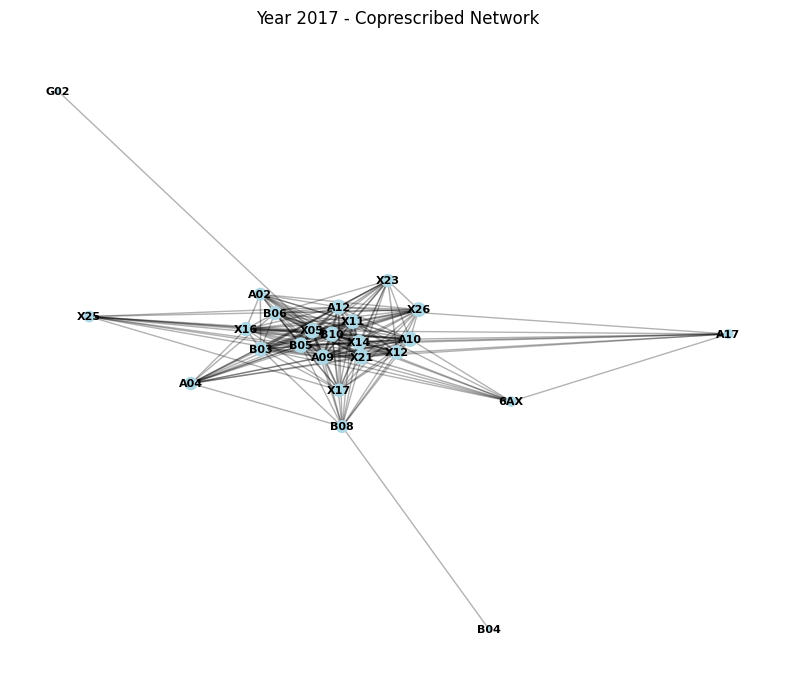

2018년 Total number of edges: 192


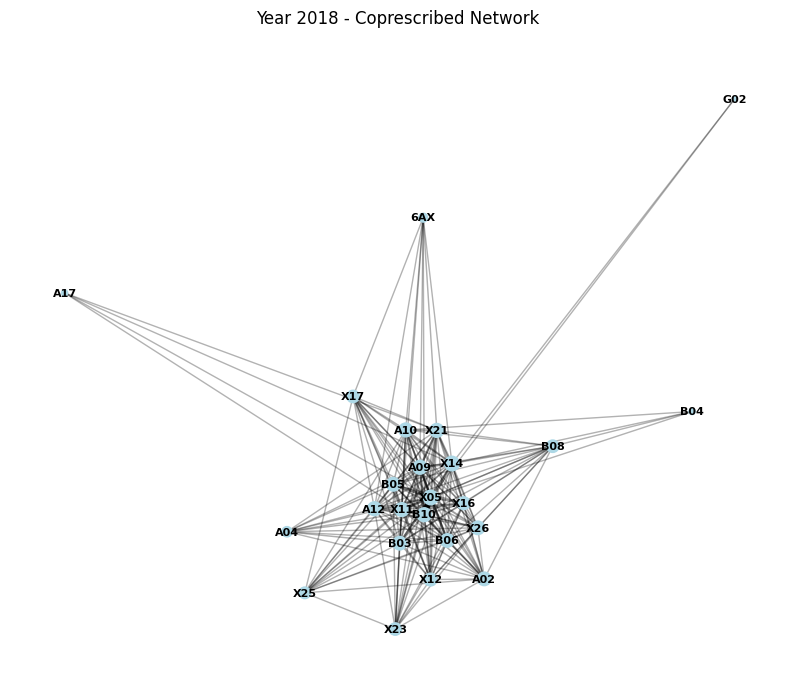

2019년 Total number of edges: 213


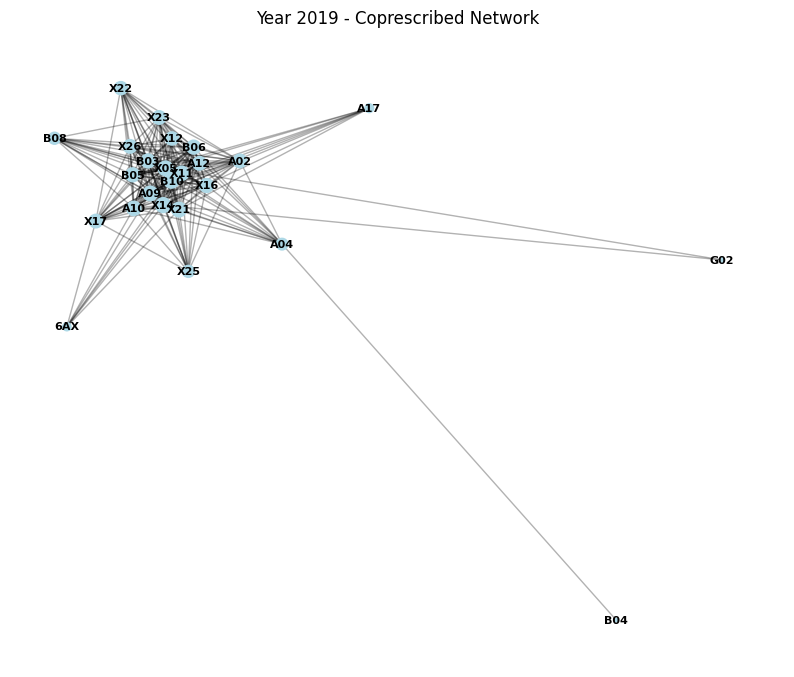

2020년 Total number of edges: 208


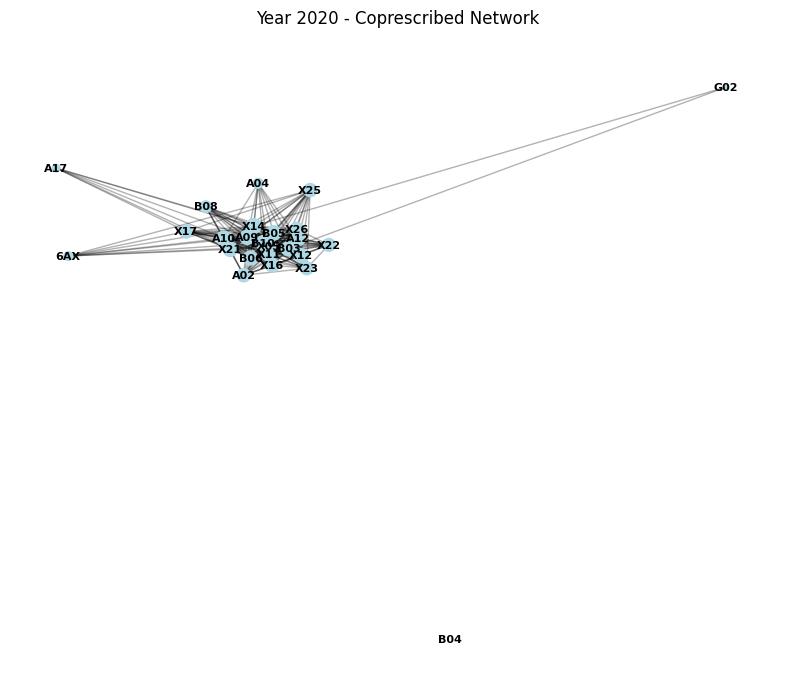

2021년 Total number of edges: 212


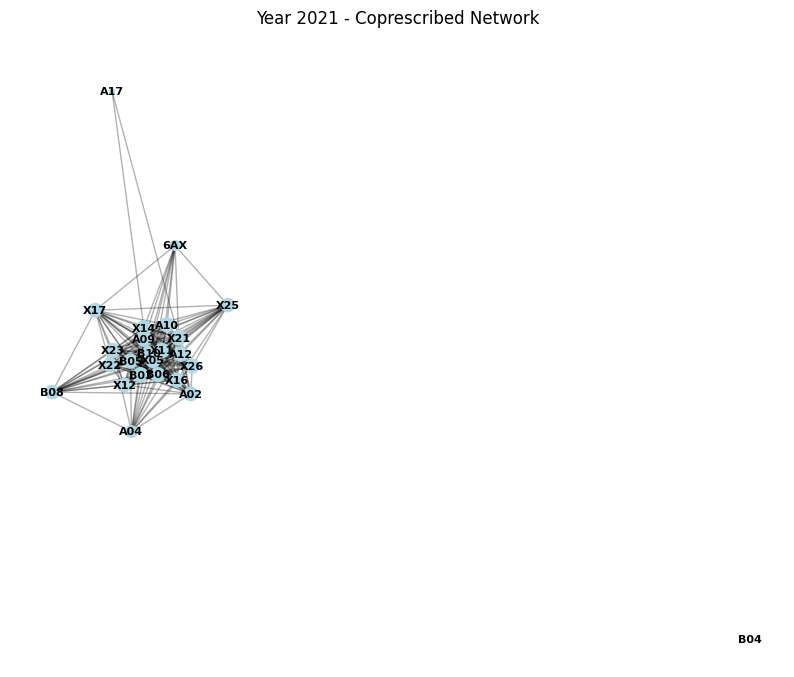

In [55]:
def visualize_annual_network(annual_adjacency_matrices, title_prefix="Year"):
    annual_graphs = {}
    
    for year, df_adjacency_matrix in annual_adjacency_matrices.items():
        # 그래프 생성
        G_coprescribed = nx.from_pandas_adjacency(df_adjacency_matrix)
        
        # 그래프 레이아웃 설정
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G_coprescribed, seed=42, k=1.0)  # k값 증가로 노드 간격 확대
        
        # 노드 크기 설정 (degree centrality 기반)
        node_size = [G_coprescribed.degree(node) * 5 for node in G_coprescribed.nodes]  # 노드 크기 증가
        
        # 엣지 가중치 기반 투명도 설정 수정
        max_weight = max([d['weight'] for u, v, d in G_coprescribed.edges(data=True)])
        for edge in G_coprescribed.edges(data="weight"):
            # 최소 투명도를 0.3으로 설정하고, 가중치에 따라 0.3-1.0 사이의 값을 가지도록 조정
            alpha = 0.3 + (edge[2] / max_weight) * 0.7
            # 엣지 너비도 증가
            width = 1 + (edge[2] / max_weight) * 3
            nx.draw_networkx_edges(G_coprescribed, pos, 
                                 edgelist=[edge],
                                 alpha=alpha,
                                 width=width,
                                 edge_color='black')  # 엣지 색상 추가
        
        # 노드 그리기 (색상과 테두리 추가)
        nx.draw_networkx_nodes(G_coprescribed, pos, 
                             node_size=node_size,
                             node_color='lightblue',
                             linewidths=1)
        
         # 라벨 설정 수정 - 뒤에서 3글자만 표시
        labels = {node: node[-3:] for node in G_coprescribed.nodes}
        nx.draw_networkx_labels(G_coprescribed, pos, 
                              labels, 
                              font_size=8,
                              font_weight='bold')
        
        edge_count = G_coprescribed.number_of_edges()
        print(f'{year}년 Total number of edges: {edge_count}')
        
        plt.title(f"{title_prefix} {year} - Coprescribed Network", pad=20)
        plt.axis('off')
        plt.show()
        
        annual_graphs[year] = G_coprescribed
    
    return annual_graphs

# 실행
annual_graphs = visualize_annual_network(annual_adjacency_matrices)

### gephi에서 시각화 위한 동적 네트워크 파일 생성(누적이 아닌 엣지는 시각화하는 데에 한계가 있는 것 같다...)

In [69]:
def create_annual_dynamic_gexf(data):
    G = nx.Graph()
    
    # 노드 추가
    all_nodes = set(data['ATC코드'].unique())
    for node in all_nodes:
        G.add_node(node, 
                  label=str(node),
                  start='2017-01-01T00:00:00.000',
                  end='2021-12-31T23:59:59.000')
    
    # 연도별로 엣지 추가
    edge_info = {}  # 전체 엣지 정보 저장
    edge_first_occurrence = {}  # 각 엣지의 최초 발생 시점 저장
    
    for year, df_year in data.groupby(data['요양개시일자'].dt.year):
        # 해당 연도의 처방전별 처리
        df_year_sorted = df_year.sort_values('요양개시일자')
        year_end = f'{year}-12-31T23:59:59.000'
        
        # 현재 연도의 엣지 정보 초기화
        current_year_edges = {}
        
        for _, group in df_year_sorted.groupby('처방내역일련번호'):
            prescription_date = group['요양개시일자'].iloc[0]
            start_date = prescription_date.strftime('%Y-%m-%dT00:00:00.000')
            
            drugs = group['ATC코드'].unique()
            for i in range(len(drugs)):
                for j in range(i + 1, len(drugs)):
                    source, target = sorted([str(drugs[i]), str(drugs[j])])
                    edge_key = (source, target)
                    
                    # 엣지의 최초 발생 시점 저장
                    if edge_key not in edge_first_occurrence:
                        edge_first_occurrence[edge_key] = start_date
                    
                    # 현재 연도의 엣지 가중치 계산
                    if edge_key not in current_year_edges:
                        current_year_edges[edge_key] = 1
                    else:
                        current_year_edges[edge_key] += 1
        
        # 현재 연도의 엣지 정보 저장 부분 수정
        for edge_key, weight in current_year_edges.items():
            if edge_key not in edge_info:
                edge_info[edge_key] = []
            
            # 이전 연도가 inactive였는지 확인
            prev_year_info = next((info for info in edge_info[edge_key] 
                                if info['year'] == year-1), None)
            
            edge_info[edge_key].append({
                'start': edge_first_occurrence[edge_key],  # 최초 발생 시점
                'end': year_end,
                'year': year,
                'weight': weight,  # 현재 연도의 실제 가중치
                'inactive': False  # 현재 연도에 존재하므로 active
            })
        
        # 해당 연도에 없는 엣지 처리
        for edge_key in edge_info:
            if edge_key not in current_year_edges:
                prev_year_info = next((info for info in edge_info[edge_key] 
                                    if info['year'] == year-1), None)
                
                if not any(info['year'] == year for info in edge_info[edge_key]):
                    edge_info[edge_key].append({
                        'start': edge_first_occurrence[edge_key],
                        'end': year_end,
                        'year': year,
                        'inactive': True,
                        'weight': prev_year_info['weight'] if prev_year_info else 0
                    })
    
    # 모든 엣지를 그래프에 추가
    for (source, target), intervals in edge_info.items():
        for interval in intervals:
            edge_id = f"{source}-{target}-{interval['year']}"
            if interval.get('inactive', False):
                color = 'white'
            else:
                color = 'blue'
            
            G.add_edge(source, target,
           id=edge_id,
           start=interval['start'],
           end=interval['end'],
           weight=float(interval['weight']),
           viz={'color': {'r': 255, 'g': 255, 'b': 255, 'a': 1} if interval.get('inactive', False) 
                else {'r': 0, 'g': 0, 'b': 255, 'a': 1}})
    
    # Degree centrality 및 노드 크기 계산
    degree_centrality = nx.degree_centrality(G)
    max_size, min_size = 100, 10
    
    for node in all_nodes:
        size = min_size + (degree_centrality[node] * (max_size - min_size))
        G.nodes[node]['size'] = size
    
    nx.write_gexf(G, '2017_2021_annual_dynamic_network_12.gexf', version='1.2draft')
    return G

# 실행
G = create_annual_dynamic_gexf(data)

### 모든 연도에 이어진 엣지는 파란색, 아닌경우 회색

In [76]:
def visualize_annual_network(annual_adjacency_matrices, title_prefix="Year"):
    annual_graphs = {}
    
    # 모든 연도의 엣지 정보 수집
    all_edges = set()
    edge_presence = {}
    
    for year, df in annual_adjacency_matrices.items():
        current_edges = set()
        for i, j in zip(*np.where(df != 0)):
            edge = tuple(sorted([df.index[i], df.columns[j]]))
            current_edges.add(edge)
            all_edges.add(edge)
            
            if edge not in edge_presence:
                edge_presence[edge] = set()
            edge_presence[edge].add(year)
    
    for year, df_adjacency_matrix in annual_adjacency_matrices.items():
        G_coprescribed = nx.from_pandas_adjacency(df_adjacency_matrix)
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G_coprescribed, seed=42, k=1.0)
        
        node_size = [G_coprescribed.degree(node) * 5 for node in G_coprescribed.nodes]
        
        # 모든 엣지 그리기
        for edge in all_edges:
            source, target = edge
            if edge in edge_presence:
                # 모든 연도에 존재하면 파란색, 하나라도 없으면 회색
                if len(edge_presence[edge]) == len(annual_adjacency_matrices):
                    color = 'blue'
                else:
                    color = 'gray'
                    
                if (source, target) in G_coprescribed.edges():
                    weight = df_adjacency_matrix.loc[source, target]
                    alpha = 0.3 + (weight / df_adjacency_matrix.max().max()) * 0.7
                    width = 1 + (weight / df_adjacency_matrix.max().max()) * 3
                else:
                    alpha = 0.2
                    width = 0.5
                
                if source in G_coprescribed.nodes() and target in G_coprescribed.nodes():
                    nx.draw_networkx_edges(G_coprescribed, pos,
                                         edgelist=[(source, target)],
                                         alpha=alpha,
                                         width=width,
                                         edge_color=color)
        
        nx.draw_networkx_nodes(G_coprescribed, pos,
                             node_size=node_size,
                             node_color='lightblue',
                             linewidths=1)
        
        labels = {node: node[-3:] for node in G_coprescribed.nodes}
        nx.draw_networkx_labels(G_coprescribed, pos,
                              labels,
                              font_size=8,
                              font_weight='bold')
        
        plt.title(f"{title_prefix} {year} - Coprescribed Network", pad=20)
        plt.axis('off')
        plt.show()
        
        annual_graphs[year] = G_coprescribed
    
    return annual_graphs

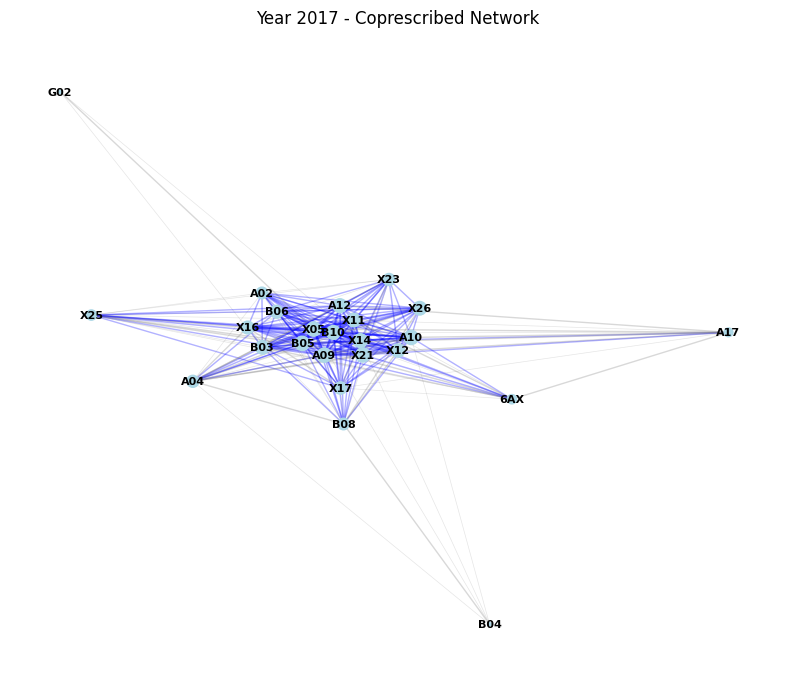

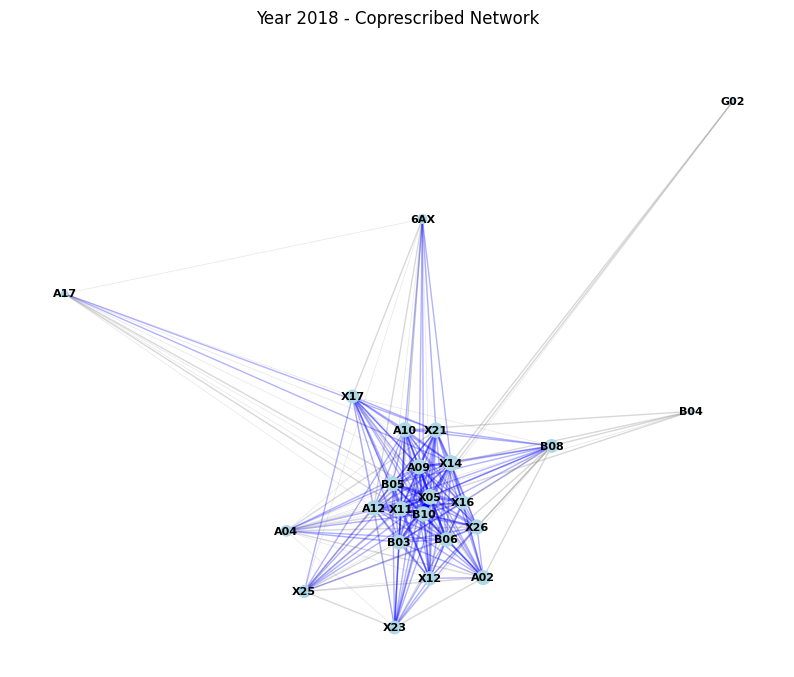

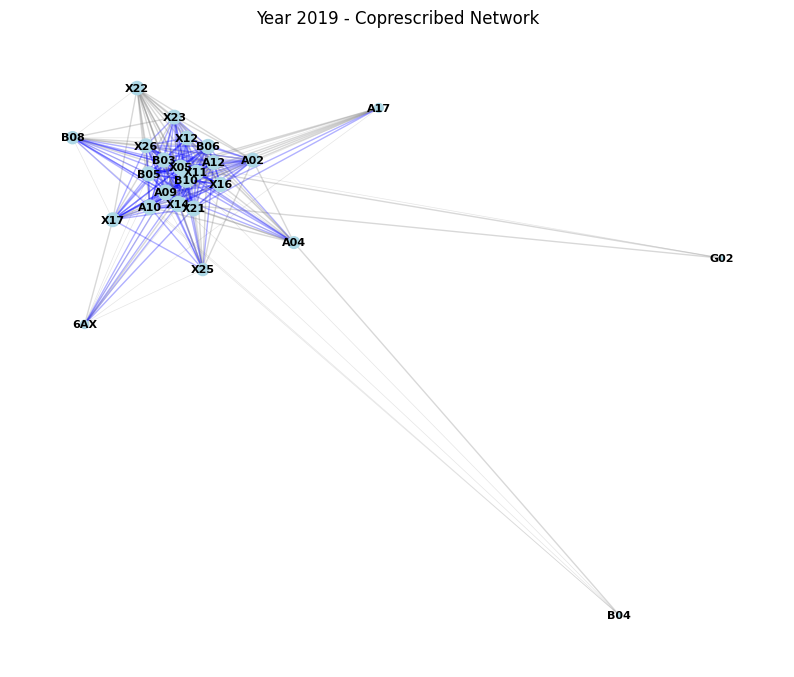

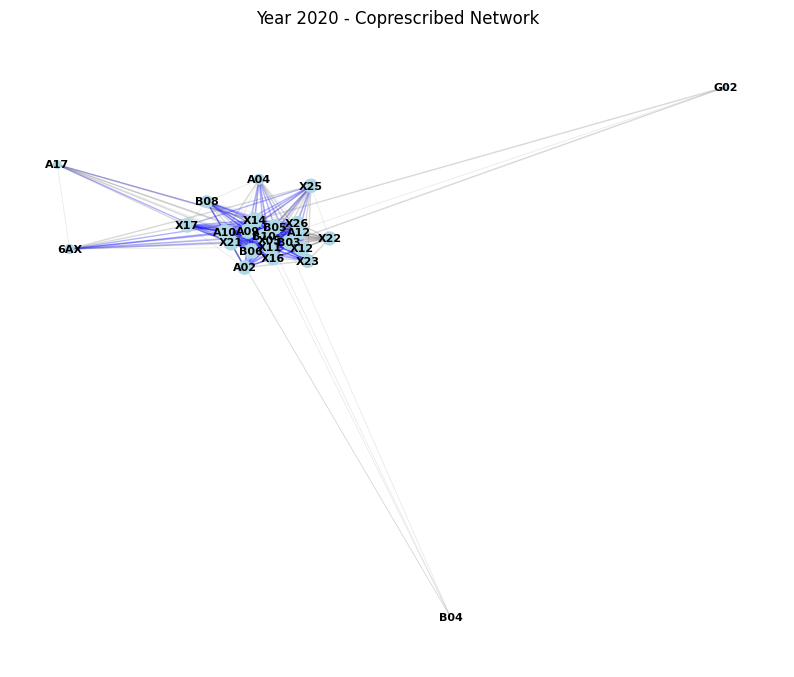

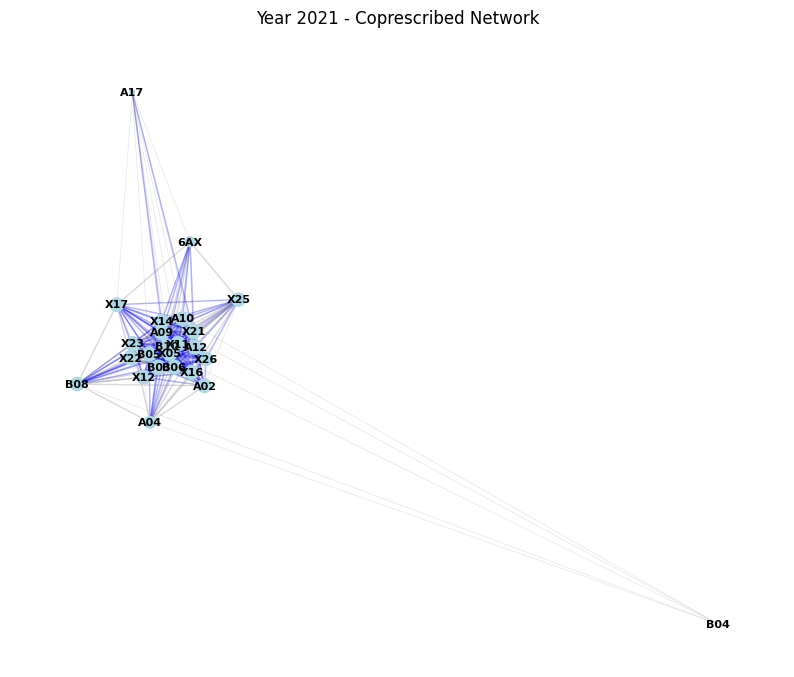

In [77]:
# 실행
annual_graphs = visualize_annual_network(annual_adjacency_matrices)

### 일단 누적 연도별 변화라도 생성하기

In [5]:
def create_annual_dynamic_gexf(data):
    G = nx.Graph()
    
    # 노드 추가
    all_nodes = set(data['ATC코드'].unique())
    for node in all_nodes:
        G.add_node(node, 
                  label=str(node),
                  start='2017-01-01T00:00:00.000',
                  end='2021-12-31T23:59:59.000')
    
    # 엣지의 최초 발생 시점과 누적 가중치 저장
    edge_info = {}
    
    for year, df_year in data.groupby(data['요양개시일자'].dt.year):
        df_year_sorted = df_year.sort_values('요양개시일자')
        
        for _, group in df_year_sorted.groupby('처방내역일련번호'):
            prescription_date = group['요양개시일자'].iloc[0]
            start_date = prescription_date.strftime('%Y-%m-%dT00:00:00.000')
            
            drugs = group['ATC코드'].unique()
            for i in range(len(drugs)):
                for j in range(i + 1, len(drugs)):
                    source, target = sorted([str(drugs[i]), str(drugs[j])])
                    edge_key = (source, target)
                    
                    if edge_key not in edge_info:
                        # 처음 발견된 엣지
                        edge_info[edge_key] = {
                            'start': start_date,
                            'weight': 1
                        }
                    else:
                        # 이미 존재하는 엣지는 가중치만 증가
                        edge_info[edge_key]['weight'] += 1
    
    # 모든 엣지를 그래프에 추가
    for (source, target), info in edge_info.items():
        G.add_edge(source, target,
                  start=info['start'],
                  end='2021-12-31T23:59:59.000',
                  weight=float(info['weight']))
    
    nx.write_gexf(G, '2017_2021_cumulative_network.gexf', version='1.2draft')
    return G

In [6]:
# 실행
G = create_annual_dynamic_gexf(data)

## 연도별 네트워크 그려서 노드 고정시키기(동적X)

In [25]:
def create_adjacency_matrix(data, year):
    # 해당 연도의 데이터만 필터링
    year_data = data[data['기준년도'] == year]
    
    # 유니크한 ATC 코드 추출
    unique_atc = year_data['ATC코드'].unique()
    
    # 빈 인접행렬 생성
    matrix = pd.DataFrame(0, index=unique_atc, columns=unique_atc)
    
    # 동일 환자가 같은 날짜에 처방받은 약품들 간의 연관성 계산
    for _, group in year_data.groupby(['처방내역일련번호']):
        atc_codes = group['ATC코드'].unique()
        for i in range(len(atc_codes)):
            for j in range(i+1, len(atc_codes)):
                matrix.loc[atc_codes[i], atc_codes[j]] += 1
                matrix.loc[atc_codes[j], atc_codes[i]] += 1
    
    return matrix

In [26]:
def visualize_graph_with_atc(df_adjacency_matrix, year):
    # 그래프 생성
    G_coprescribed = nx.from_pandas_adjacency(df_adjacency_matrix)
    
    # self-loop 제거
    G_coprescribed.remove_edges_from(nx.selfloop_edges(G_coprescribed))
    
    # 그래프 레이아웃 설정
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G_coprescribed, seed=42, k=0.7)
    
    # Degree centrality 계산
    deg_centrality = nx.degree_centrality(G_coprescribed)
    node_size = [deg_centrality[node] * 3000 for node in G_coprescribed.nodes]
    
    # 엣지 가중치 설정
    edge_weights = [d['weight'] for (u, v, d) in G_coprescribed.edges(data=True)]
    max_weight = max(edge_weights) if edge_weights else 1
    
    # 엣지 그리기
    for edge in G_coprescribed.edges(data="weight"):
        nx.draw_networkx_edges(G_coprescribed, pos, edgelist=[edge[:2]], 
                            alpha=edge[2] / max_weight,
                            width=edge[2] / max_weight * 2)
    
    # 노드 색상 설정
    nodes = list(G_coprescribed.nodes())
    node_color = [plt.cm.tab20(i/len(nodes)) for i in range(len(nodes))]
    
    # 노드 그리기
    nx.draw_networkx_nodes(G_coprescribed, pos, 
                          node_size=node_size,
                          node_color=node_color)
    
    # 라벨 그리기
    nx.draw_networkx_labels(G_coprescribed, pos, font_size=8)
    
    plt.title(f'ATC Code Network - {year}')
    plt.axis('off')
    
    # Gephi 파일로 저장 (원본 그래프에서 저장)
    nx.write_gexf(G_coprescribed, f'atc_network_{year}.gexf')
    plt.close()
    
    return G_coprescribed

In [27]:
# 각 연도별로 시각화 실행
for year in [2017, 2018, 2019, 2020, 2021]:
    adj_matrix = create_adjacency_matrix(data, year)
    G = visualize_graph_with_atc(adj_matrix, year)
    print(f'\n{year}년 네트워크 정보:')
    print(f'노드 수: {G.number_of_nodes()}')
    print(f'엣지 수: {G.number_of_edges()}')


2017년 네트워크 정보:
노드 수: 24
엣지 수: 189

2018년 네트워크 정보:
노드 수: 24
엣지 수: 192

2019년 네트워크 정보:
노드 수: 25
엣지 수: 213

2020년 네트워크 정보:
노드 수: 25
엣지 수: 208

2021년 네트워크 정보:
노드 수: 24
엣지 수: 212


### Pajek에서 시각화 진행하기(노드 위치 고정하기 위함)

In [30]:
def visualize_graph_with_atc(df_adjacency_matrix, year):
    # 그래프 생성
    G_coprescribed = nx.from_pandas_adjacency(df_adjacency_matrix)
    
    # self-loop 제거
    G_coprescribed.remove_edges_from(nx.selfloop_edges(G_coprescribed))
    
    # Pajek 파일로 저장
    nx.write_pajek(G_coprescribed, f'atc_network_{year}.net')
    
    
    return G_coprescribed

In [31]:
# 각 연도별로 시각화 실행
for year in [2017, 2018, 2019, 2020, 2021]:
    adj_matrix = create_adjacency_matrix(data, year)
    G = visualize_graph_with_atc(adj_matrix, year)
    print(f'\n{year}년 네트워크 정보:')
    print(f'노드 수: {G.number_of_nodes()}')
    print(f'엣지 수: {G.number_of_edges()}')


2017년 네트워크 정보:
노드 수: 24
엣지 수: 189

2018년 네트워크 정보:
노드 수: 24
엣지 수: 192

2019년 네트워크 정보:
노드 수: 25
엣지 수: 213

2020년 네트워크 정보:
노드 수: 25
엣지 수: 208

2021년 네트워크 정보:
노드 수: 24
엣지 수: 212


# 파트 2 : 코로나 기간(20,21)동안 더 많은 항우울제 처방 및 투여가 있었을 것이다. 

## 연도 별 약품(atc 코드 기준)의 투여일수의 합 살펴보기

In [11]:
# 연도와 약품별로 총투여일수 합계 계산
grouped_data = data.groupby(['기준년도', 'ATC코드'])['총투여일수'].sum().reset_index()

# 피벗 테이블 생성
pivot_table = grouped_data.pivot(index='ATC코드', columns='기준년도', values='총투여일수').fillna(0)

In [12]:
pivot_table

기준년도,2017,2018,2019,2020,2021
ATC코드,,,,,
N06AA02,110373.0,110051.0,120183.0,141433.0,133011.0
N06AA04,8655.0,8396.0,7980.0,8407.0,12217.0
N06AA09,1003528.0,1000976.0,1002352.0,1026903.0,1052497.0
N06AA10,379697.0,371166.0,381478.0,443150.0,437889.0
N06AA12,71058.0,88129.0,110077.0,114285.0,140698.0
N06AA17,9845.0,7907.0,7861.0,6529.0,3444.0
N06AB03,141843.0,169021.0,185684.0,246878.0,291461.0
N06AB04,899.0,884.0,350.0,472.0,56.0
N06AB05,211493.0,228673.0,277229.0,297892.0,313260.0


In [18]:
# 2021년과 2018년의 증가량 계산
pivot_table['증가'] = pivot_table[2021] - pivot_table[2018]

# 양의 증가량만 표시하고 내림차순 정렬
growth = pivot_table[pivot_table['증가'] > 0]['증가'].sort_values(ascending=False)
print(growth)
len(growth)

ATC코드
N06AB10    728437.0
N06AX05    285831.0
N06AX21    152808.0
N06AB06    150598.0
N06AX11    136781.0
N06AB03    122440.0
N06AX22    107696.0
N06AX26     92589.0
N06AB05     84587.0
N06AX23     71760.0
N06AA10     66723.0
N06AA12     52569.0
N06AA09     51521.0
N06AX16     44832.0
N06AX14     43144.0
N06AX25     41247.0
N06AX12     25139.0
N06AA02     22960.0
N06AX17     21986.0
N06AX       11827.0
N06AA04      3821.0
Name: 증가, dtype: float64


21